In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

with open('tasks/14.txt', 'r') as f:
    data = f.read().split()
data = np.array([[list(y) for y in x.split('\n')] for x in data])
data = data.squeeze()

In [2]:
def change_side(data, side):
    data = deepcopy(data)
    if side == 'N':
        return data
    if side == 'W':
        return data[::-1].T
    if side == 'S':
        return np.flip(data, (0,1))
    if side == 'E':
        return np.flip(data, 1).T

In [3]:
def move_rocks(data):
    data = deepcopy(data)
    hight = len(data)
    for i in range(len(data[0])):
        last_elem = hight
        for j in range(hight):
            if data[j, i] == 'O':
                data[j, i] = '.'
                data[hight - last_elem, i] = 'O'
                last_elem -= 1
            if data[j, i] == '#':
                last_elem = hight - j - 1
    return data

In [4]:
def one_cycle(data):
    data = move_rocks(data)
    for i in range(3):
        data = move_rocks(change_side(data, 'W'))
    data = change_side(data, 'W')
    return data

In [5]:
def count_weight(data):
    hight = len(data)
    total = 0
    for i in range(len(data[0])):
        last_elem = hight
        for j in range(hight):
            if data[j, i] == 'O':
                total += hight - j
    return total

In [6]:
weights = []
new_data = deepcopy(data)
for i in range(400):
    new_data = one_cycle(new_data)
    weights.append(count_weight(new_data))

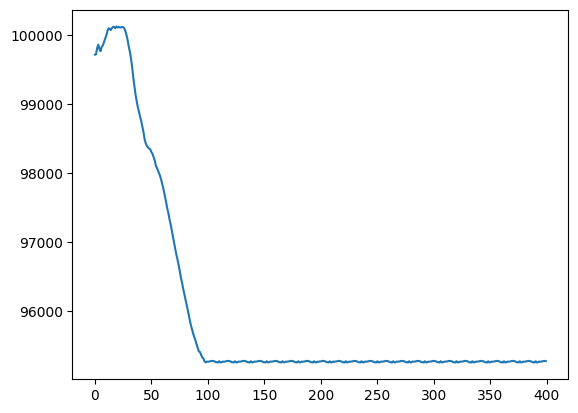

In [7]:
plt.plot(weights)

In [9]:
repeats = np.where(np.array(weights) == min(weights))[0]

In [10]:
after_same = (1_000_000_000 - repeats[0]) % (repeats[1] - repeats[0])

In [11]:
weights = []
new_data = deepcopy(data)
for _ in range(repeats[0] + after_same):
    new_data = one_cycle(new_data)
ans = count_weight(new_data)  

In [12]:
ans

95273